<a href="https://colab.research.google.com/github/kdemertzis/EKPA/blob/main/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#εγκατάσταση πακέτου PyOD (https://pyod.readthedocs.io/en/latest/)
!pip install pyod

In [2]:
#εισαγωγή βιβλιοθηκών - πακέτων
import pandas as pd
from sklearn.preprocessing import StandardScaler
from pyod.models.ecod import ECOD
import matplotlib.pyplot as plt

In [3]:
#εισαγωγή του συνόλου δεδομένων
network_data = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/network_traffic_data.csv', delimiter=',')

In [4]:
#εξαγωγή χαρακτηριστικών (ανεξάρτητων μεταβλητών) για την αναγνώριση ανωμαλιών
features = ['src_port', 'dest_port', 'packet_size', 'num_packets',
            'flow_duration', 'bytes_transferred', 'packet_rate']

X = network_data[features].values

In [5]:
#κλιμάκωση δεδομένων
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
#χρήση αλγορίθμου ECOD
model = ECOD(contamination=0.02)
model.fit(X_scaled)

ECOD(contamination=0.02, n_jobs=1)

In [7]:
#πρόβλεψη βαθμού ανωμαλίας (anomaly score)
anomaly_scores = model.decision_function(X_scaled)

In [8]:
#προσθήκη βαθμού ανωμαλίας (anomaly score) στο σύνολο δεδομένων
network_data['anomaly_score'] = anomaly_scores

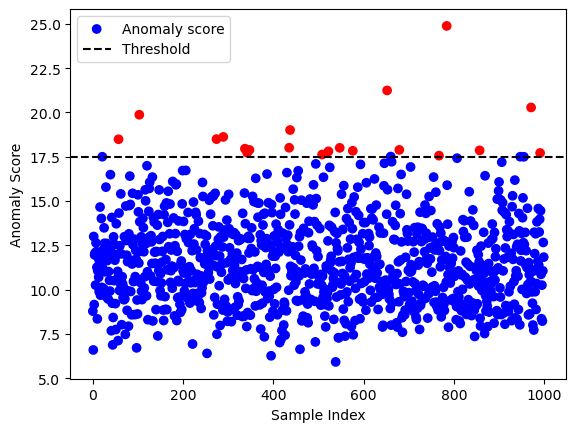

In [9]:

#οπτικοποίηση αποτελεσμάτων, με μπλε οι τιμές που θεωρούνται κανονικές και με κόκκινο όσες καταγράφονται ως ανωμαλίες
colors = ['blue' if score <= model.threshold_ else 'red' for score in anomaly_scores]

plt.scatter(network_data.index, anomaly_scores, c=colors, label='Anomaly score')
plt.axhline(y=model.threshold_, color='black', linestyle='--', label='Threshold')
plt.xlabel('Sample Index')
plt.ylabel('Anomaly Score')
plt.legend()

In [10]:
#τύπωση των τιμών που εντοπίσθηκαν ως ανωμαλίες
anomalies = network_data[network_data['anomaly_score'] > model.threshold_]
print("Detected Anomalies:")
print(anomalies)

Detected Anomalies:
              src_ip          dest_ip  src_port  dest_port protocol  \
57      14.119.240.3    156.201.16.65      1167      63332     ICMP   
103    89.145.197.36    18.163.186.62     65172      62054      UDP   
274  124.101.237.131     42.206.11.39     14464      63598     ICMP   
289   153.152.11.132   211.36.233.208     63538       3010      UDP   
337    96.163.130.72  159.186.229.190      9670      10496      TCP   
342    148.7.229.199    199.246.71.61     13841      31790      UDP   
347    97.214.29.115    189.51.88.126     58963      61750      TCP   
435    248.86.42.128    29.10.219.107     25928      65384      UDP   
437   151.16.132.147  122.199.190.191     44814       2105     ICMP   
508     108.75.29.57  205.233.248.237      5403      64437     ICMP   
522   204.106.112.93   76.131.230.245      8266      64908      UDP   
547  247.202.147.215   230.242.146.37      6539      11718     ICMP   
576    232.167.57.27     165.27.24.95     57598       215